# Using Deep Learning to predict age, gender, and ethnicity

This project is all about using Convolutional Neural Networks to predict the age, gender, and ethnicity of a person given the input image. For learning more about Convolutional Neural Networks click <a href="https://en.wikipedia.org/wiki/Convolutional_neural_network"> here</a>. You can also find the dataset <a href="https://www.kaggle.com/nipunarora8/age-gender-and-ethnicity-face-data-csv">here</a>.

In [1]:
import pandas as pd
import numpy as np

### Importing data

In [8]:
data = pd.read_csv("age_gender.csv")
del data['img_name']

In [9]:
data.head()

,age,ethnicity,gender,pixels
0,1,2,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,202 205 209 210 209 209 210 211 212 214 218 21...


In [10]:
data = data[data['age']<100]

In [11]:
data.head()

,age,ethnicity,gender,pixels
0,1,2,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,202 205 209 210 209 209 210 211 212 214 218 21...


In [12]:
data.tail()

,age,ethnicity,gender,pixels
23700,99,0,1,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,1,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,2,1,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,2,1,45 108 120 156 206 197 140 180 191 199 204 207...
23704,99,0,1,156 161 160 165 170 173 166 177 183 191 187 18...


### Preprocessing data

In [15]:
from PIL import Image
from tqdm import tqdm

In [28]:
def preprocess_data():
    
    #Age
    age = []
    for i in data['age']:
        age.append(i)
    age = np.asarray(age)
        
    #Ethnicity
    eth = []
    for i in data['ethnicity']:
        eth.append(i)
    eth = np.asarray(eth)
    
    #gender
    gender = []
    for i in data['gender']:
        gender.append(i)
    gender = np.asarray(gender)
    
    #Pixel values
    pixel_values = []
    for value in data['pixels']:
        pixel_values.append(value.split())
    
    pixel_values_copy = [list(map(int, x)) for x in pixel_values]
    pixel_values = pixel_values_copy
    pixel_values = np.asarray(pixel_values)
    
    pixel_values_array = np.array(pixel_values, dtype=np.uint8)
    pixel_values_array = pixel_values_array.reshape(-1, 48, 48)
    
    np.save("pixel_values.npy", pixel_values_array)
    np.save("age.npy", age)
    np.save("ethnicity.npy", eth)
    np.save("gender.npy", gender)
#      #Image names
#     image_name = []
#     for i in tqdm(range(23673)): 
#         image_name.append(str(i)+".jpg")
#         image_save = Image.fromarray(pixel_values_array[i])
#         image_save.convert("RGB")
#         image_save.save('data/'+image_name[i])

In [29]:
preprocess_data()

### Visualizing our Data

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
pixel_values = np.load("pixel_values.npy", allow_pickle=True)
age = np.load("age.npy", allow_pickle=True)
eth = np.load("ethnicity.npy", allow_pickle=True)
gender = np.load("gender.npy", allow_pickle=True)

<Figure size 432x288 with 0 Axes>

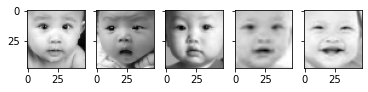

In [16]:
#printing the first 5 images

fig = plt.figure()

F, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, sharey=True)

ax1.imshow(pixel_values[0], cmap="gray")
ax2.imshow(pixel_values[1], cmap="gray")
ax3.imshow(pixel_values[2], cmap="gray")
ax4.imshow(pixel_values[3], cmap="gray")
ax5.imshow(pixel_values[4], cmap="gray")

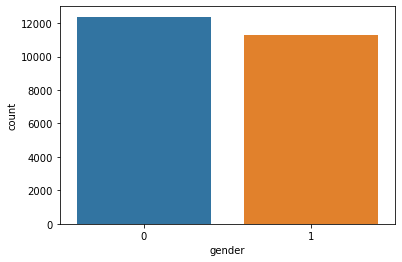

In [17]:
sns.countplot(x='gender', data=data)

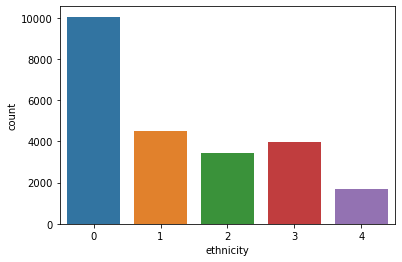

In [18]:
sns.countplot(x='ethnicity', data=data)

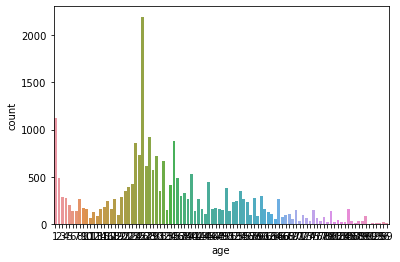

In [19]:
sns.countplot(x='age', data=data) 

### Resizing and ccleaning up the images

In [20]:
import os 
import cv2

In [32]:
def make_train_data(): 
        
    image_dir = os.listdir("data/")
    IMG_SIZE = 48
    dataset = []

    for image in image_dir:
        image_read = cv2.imread(f'data/{image}', cv2.IMREAD_GRAYSCALE)
        image_read = cv2.resize(image_read, (IMG_SIZE, IMG_SIZE))
        dataset.append(image_read)
    np.random.shuffle(dataset)
    np.save("final_dataset.npy", dataset)

In [33]:
make_train_data()

### Fixing up our data for it to be passed into the neural network

In [44]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [45]:
final_dataset = np.load("final_dataset.npy", allow_pickle=True)
age_labels = np.load("age.npy", allow_pickle=True)
eth_labels = np.load("ethnicity.npy", allow_pickle=True)
gender_labels = np.load("gender.npy", allow_pickle=True)

In [46]:
age_labels = torch.from_numpy(age_labels)
eth_labels = torch.from_numpy(eth_labels)
gender_labels = torch.from_numpy(gender_labels)

In [81]:
X = torch.Tensor([i for i in final_dataset]).view(-1, 48, 48)
X = X/255.0

In [62]:
X.shape

torch.Size([23673, 48, 48])

In [80]:
# from sklearn.model_selection import train_test_split
# train_X, test_X, train_y, test_y = train_test_split(X, age_labels, train_size=0.8, test_size=0.2, random_state=42)
# train_y = train_y.type(torch.LongTensor)
# test_y = test_y.type(torch.LongTensor)

### Building our neural network

In [111]:
class neural_network(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 64, 3),
            nn.ReLU(),
            nn.MaxPool2d((2,2)),
            nn.Dropout(p=0.1),
            nn.BatchNorm2d(64))
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 128, 3),
            nn.ReLU(),
            nn.MaxPool2d((2,2)),
            nn.Dropout(p=0.1),
            nn.BatchNorm2d(128))  
        
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(128, 256, 3),
            nn.ReLU(),
            nn.MaxPool2d((2,2)),
            nn.Dropout(p=0.1),
            nn.BatchNorm2d(256)) 
        
        self.layer4 = nn.Sequential(
            nn.Conv2d(256, 512, 3),
            nn.ReLU(),
            nn.MaxPool2d((2,2)),
            nn.Dropout(p=0.1),
            nn.BatchNorm2d(512)) 
        
        self.flatten = nn.Flatten()
#         self.fc1 = nn.Linear(1024, 512)
        self.dropout = nn.Dropout(p=0.5)
        self.output = nn.Linear(512, 2)

    def forward(self, x):
        x = x.view(-1,1,48,48)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.flatten(x)
    
#         x = self.fc1(x)
#         x = self.dropout(x)
        x = self.output(x)
        return torch.sigmoid(x)

In [120]:
neural_net = neural_network()
neural_net

neural_network(
  (layer1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.1, inplace=False)
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.1, inplace=False)
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.1, inplace=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (la

In [118]:
import torch.optim as optim

optimizer = optim.Adam(neural_net.parameters(), lr=1e-1)
loss_function = nn.NLLLoss()

In [119]:
EPOCHS = 3
BATCH_SIZE = 10
y = gender_labels
y = y.type(torch.LongTensor)

correct = 0
predictions = []
correct_labels = []
total = 0

for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(X), BATCH_SIZE)):
        
        train_X = X[i:i+BATCH_SIZE]
        train_y = y[i:i+BATCH_SIZE]
        neural_net.zero_grad()
        output = neural_net(train_X)
        loss = loss_function(output, train_y)
        loss.backward()
        optimizer.step()
        
        for idx, i in enumerate(output):
            if torch.argmax(i) == train_y[idx]:
                correct += 1
            predictions.append(torch.argmax(i).tolist())
            correct_labels.append(train_y[idx].tolist())
            total += 1
    print(loss)

print("Accuracy: ", round(correct/total, 3))

  0%|          | 1/2368 [00:00<07:07,  5.54it/s]

tensor(-1., grad_fn=<NllLossBackward>)


 60%|██████    | 1423/2368 [04:19<02:52,  5.48it/s]


KeyboardInterrupt: 